## Keras Tuner
### Helps to search the best given hyperparameters
### learning rate, number of neurons in hidden layer and l1 and l2 regularisation


In [85]:
#import all the libraries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [86]:
# Height and width to standarise all images
IMG_HEIGHT = 256
IMG_WIDTH = 256
RESHAPE_DIM = [IMG_HEIGHT, IMG_WIDTH]

#class names 
CLASS_NAMES = ['cats', 'dogs']

#function to read the image and convert the image between 0 - 1.
#Also, reshae the image to the defined height and width
def read_and_decode(filename, reshape_dim):
    img = tf.io.read_file(filename)
    img = tf.io.decode_jpeg(img) #range in value of 0 to 255
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, reshape_dim)
    
    return img
#Read the image path and label from the csv files. Along wiith the label in one hot encoded or sparse 
def decode_csv(csv_row):
    record_defaults = ['path', 'label']
    filename, label = tf.io.decode_csv(csv_row, record_defaults=record_defaults)
    img = read_and_decode(filename, RESHAPE_DIM) 
    # label = tf.math.equal((CLASS_NAMES), label)  #one hot 
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label)) #label encoding 
    return img, label 
# Plot the image. 
def show_image(filename):
    img = read_and_decode(filename, RESHAPE_DIM)
    plt.imshow(img.numpy())
    

In [87]:
training_csv_path = r'C:\\Users\\moham\\Documents\\MLProjects\\4-Object_Detection_LinearModel\\dataset\\training_set\\training_set\\training_set.csv'
eval_csv_path = r'C:\\Users\\moham\\Documents\\MLProjects\\4-Object_Detection_LinearModel\\dataset\\training_set\\eval_set\\eval_set.csv'

#Evalaution batch size different from training will not matter
training_dataset = (tf.data.TextLineDataset(training_csv_path).skip(1).map(decode_csv)).batch(1)
eval_dataset = (tf.data.TextLineDataset(eval_csv_path).skip(1).map(decode_csv)).batch(1)


tf.Tensor(
[[[0.9084086  0.85817045 0.7981728 ]
  [0.60651803 0.5373642  0.4615363 ]
  [0.5557528  0.4608005  0.35983935]
  ...
  [0.5122816  0.4024777  0.31620318]
  [0.4679987  0.35819477 0.27192026]
  [0.4588412  0.34903726 0.26276276]]

 [[0.9329121  0.854588   0.76922566]
  [0.60194623 0.50776947 0.4047419 ]
  [0.5467765  0.42392936 0.29987973]
  ...
  [0.32919568 0.21154863 0.11512615]
  [0.31244218 0.19479512 0.09873622]
  [0.31700298 0.19935593 0.10477731]]

 [[0.95385784 0.86743724 0.76510507]
  [0.59549886 0.47921932 0.35775086]
  [0.5325116  0.38329387 0.23768488]
  ...
  [0.4087186  0.28639603 0.17885385]
  [0.40284327 0.2802518  0.17351636]
  [0.3885336  0.26484728 0.16139643]]

 ...

 [[0.9976219  0.98697925 0.9384575 ]
  [0.97408503 0.9623475  0.90954006]
  [0.9519182  0.94263077 0.8773548 ]
  ...
  [0.9121281  0.92781436 0.82977515]
  [0.9006664  0.9163527  0.8183135 ]
  [0.90453047 0.92021674 0.8221775 ]]

 [[0.9989124  0.99733317 0.9474711 ]
  [0.9877597  0.9831836  0

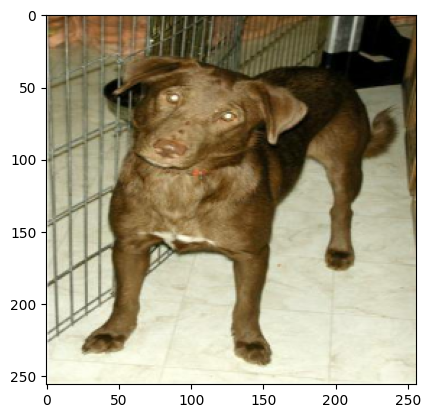

In [88]:
test_img_1 = r"C:\Users\moham\Documents\MLProjects\4-Object_Detection_LinearModel\dataset\training_set\training_set\dogs\dog.1.jpg"
show_image(test_img_1)
test_img_1 = read_and_decode(test_img_1, RESHAPE_DIM)
print(test_img_1)


In [89]:
#Take multiple images from the dataset to check if the images are valid and not corrupted
for img, label in training_dataset.take(1):
    # show_image(img)
    avg = tf.math.reduce_mean(img, axis = [0, 1])
    print(label, avg)
    # show_image(img)

tf.Tensor([1], shape=(1,), dtype=int64) tf.Tensor(
[[0.5526219  0.52994263 0.5249039 ]
 [0.55340284 0.53109425 0.52613413]
 [0.55179095 0.53000766 0.5250375 ]
 [0.55833864 0.5366805  0.5316007 ]
 [0.56232    0.5404618  0.53533417]
 [0.5705008  0.54813385 0.54241514]
 [0.5664221  0.5434122  0.5367558 ]
 [0.559869   0.536484   0.5293604 ]
 [0.5586391  0.53656375 0.5296675 ]
 [0.56043535 0.53942996 0.532552  ]
 [0.5744957  0.5533857  0.5465897 ]
 [0.5730074  0.551581   0.5449133 ]
 [0.56434554 0.54290557 0.5360441 ]
 [0.5662016  0.5447537  0.5380019 ]
 [0.57172    0.550116   0.54331326]
 [0.5790577  0.5573276  0.55054903]
 [0.584112   0.5610163  0.55381864]
 [0.58229965 0.5594849  0.5521916 ]
 [0.5775573  0.5548814  0.54852307]
 [0.5748723  0.55253226 0.5473298 ]
 [0.5683841  0.54610646 0.54174984]
 [0.55796266 0.53517604 0.53140104]
 [0.560547   0.53703517 0.53353834]
 [0.5684515  0.54432285 0.54091895]
 [0.5634721  0.53953874 0.5370714 ]
 [0.5675988  0.54496497 0.54394853]
 [0.56819135 

In [96]:
#pip install keras-tuner
import keras_tuner as kt
#hp is an instance of keras tuner hyperparameters
def build_model(hp):
    num_hidden = hp.Int("num_hidden", 128, 256)
    lrate = hp.Float("lrate", 1e-4, 1e-3, sampling = 'log') #linear additive distance, log multiplicative factor
    l1 = 0
    l2 = hp.Choice('l2', values = [0.0, 1e-1])
    
    regulariser = tf.keras.regularizers.l1_l2(l1, l2)
    
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (IMG_HEIGHT, IMG_HEIGHT, 3)),
        tf.keras.layers.Dense(num_hidden, kernel_regularizer=regulariser, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
    )
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=tf.keras.metrics.Accuracy()
    ) 
  
    return model 

In [91]:
tuner = kt.BayesianOptimization(
    build_model,
    objective = kt.Objective('val_accuracy', 'max'),
    max_trials = 10,
    num_initial_points = 2,
    overwrite = True
)



In [92]:
tuner.search(
    training_dataset, validation_data = eval_dataset, 
    epochs = 5,
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=1)]
)

Trial 10 Complete [00h 07m 57s]
val_accuracy: 0.4050000011920929

Best val_accuracy So Far: 0.4950000047683716
Total elapsed time: 02h 21m 04s


In [94]:
topN = 1
for x in range(topN):
    print(tuner.get_best_hyperparameters(topN)[x].values)
    print(tuner.get_best_models(topN)[x].summary())

{'num_hidden': 147, 'lrate': 0.0002416048194354367, 'l2': 0.1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 147)               28901523  
                                                                 
 dense_1 (Dense)             (None, 1)                 148       
                                                                 
Total params: 28901671 (110.25 MB)
Trainable params: 28901671 (110.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
